# #1 Прочитать про астроциты, нейроны, tripartite synapse. Написать вкратце, что поняли.

 Нейроны - это основные клетки нервной системы. Они состоят из тела (сомы) и отростков (дендриты и аксоны). Нейроны могут иметь разную форму в зависимости от выполняемой функции и области, куда они входят. 
Дентриты - короткие отростки нерйонов- часто могут многократно ветвится.
Аксон у нейронов один. Он заканчивается терминальным расширением.
Астроциты - вспомогательные клетки нервной системы, относятся к системе глиальных элементов нервной ткани. Выполняют следующие функции. Они служат для опоры и поддержки нейронов, выполняют трофическую функцию. Создают гематоэнцефалический барьер. 
Tripartite synapse — это синапс, состоящий из двух нейронов и астроцита в качестве функциональной единицы.
В tripartite synapse нейротрансмиттеры, высвобождаемые нейронами, также связываются с рецепторами на соседнем процессе астроцита. Это активирует сигнальные пути в астроцитах, которые модулируют синаптическое поведение.

# #2  Анализ


Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import cv2
import pathlib2
from pathlib2 import Path
import pandas as pd

In [3]:
from listofpaths import list_paths
data_path = Path(r'D:\Education\kurs 3\sem 2\Progr\Task Astrocytes')
path_folder = list_paths(data_path)

In [4]:
path_folder

[WindowsPath('D:/Education/kurs 3/sem 2/Progr/Task Astrocytes/2016-05-18_fileNo11_BM3D_z-max'),
 WindowsPath('D:/Education/kurs 3/sem 2/Progr/Task Astrocytes/2016-05-26_fileNo32_BM3D_z-max'),
 WindowsPath('D:/Education/kurs 3/sem 2/Progr/Task Astrocytes/31_08_2020_tser1'),
 WindowsPath('D:/Education/kurs 3/sem 2/Progr/Task Astrocytes/31_08_2020_tser2'),
 WindowsPath('D:/Education/kurs 3/sem 2/Progr/Task Astrocytes/31_08_2020_tser3'),
 WindowsPath('D:/Education/kurs 3/sem 2/Progr/Task Astrocytes/31_08_2020_tser4')]

# Функция, которая по заданному относительному пути ищет картинки png-формата в указанной директории

In [5]:
def poisk_png(directory):
    astro_mask = directory /  '**' / '*.png'
    file_names = glob.glob(str(astro_mask))
    return file_names

# Функция, которая принимает список путей для каждой из папок до разделения на images и events и создаёт датасет для каждой из папок, который сохраняет в список датасетов. Возвращает список датасетов

In [6]:
def Datasety(pyt):
  
    dataframes = []
    for proc in pyt:
        types_of_video = []
        image_names = []
        moments = []
        file_paths = []
        nazvania = []
        times = []
        file_names = poisk_png(proc)
        for file_name in file_names:
            file_path = Path(file_name)
            name = file_path.stem
            if '_' in name:
                name_parts = name.split('_')
            elif '-' in name:
                name_parts = name.split('-')
            else:
                print('AAAAAAAAAAAAA!!!!!')
            nazvanie = file_path.parents[2].stem
            type_of_video = file_path.parents[0].stem
            image_name = name
            moment = name_parts[1]
            time = str(moment[1:])
            
            file_paths.append(file_path)
            image_names.append(image_name)
            moments.append(moment)
            types_of_video.append(type_of_video)
            nazvania.append(nazvanie)
            times.append(time)

        df = pd.DataFrame({
            'image_name': image_names,
            'file_path': file_paths,
            'types_of_video': types_of_video,
            'moments': moments,
            'nazvania': nazvania,
            'times' :times
        })
        dataframes.append(df)
    return dataframes

In [7]:
astro_sets = Datasety(path_folder)

In [8]:
astro_sets 

[       image_name                                          file_path  \
 0        event_t1  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 1       event_t10  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 2      event_t100  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 3      event_t101  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 4      event_t102  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 ..            ...                                                ...   
 595  smoothed_t95  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 596  smoothed_t96  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 597  smoothed_t97  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 598  smoothed_t98  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 599  smoothed_t99  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 
     types_of_video moments         nazvania times  
 0           events      t1  Task Astrocytes     1  
 1           eve

Функция для сортировки датасета по столбцу times

In [9]:
def sorted_dataset_by_times(df):
    df['times'] = df['times'].astype(int)
    df_sorted =  df.sort_values(by='times')
    return df_sorted

In [10]:
#6.5. двумерная гистограмма: для каждого пикселя количество моментов времени, когда он горел.

def two_dimensional_illumination_histogram(number, pyt):
   df_result = Datasety(pyt)
   df_video_number = df_result[number]
   df_type_video_events = df_video_number[df_video_number['types_of_video'] == 'events']
   df_sorted_moments = sorted_dataset_by_times(df_type_video_events)
   im_path = df_sorted_moments['file_path'].tolist()

   path_str = str(im_path[number])
   img = cv2.imread(path_str)

   img = np.array(img)
   illuminat = np.zeros((len(img),len(img[0]), len(img[0][0])), dtype=int)

   for path in im_path:
      img = cv2.imread(path)
      img = np.array(img)
      for line in range(len(img)):
         for tupl in range(len(img[0])): 
            for pix in range(len(img[0][0])):
               if img[line][tupl][pix] != 0:
                  illuminat[line][tupl][pix] += 1
   return illuminat
  
   

cho = two_dimensional_illumination_histogram(3, path_folder)
print(cho)


C:\Users\Podokonnik\AppData\Local\Temp\ipykernel_13036\1614941690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['times'] = df['times'].astype(int)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


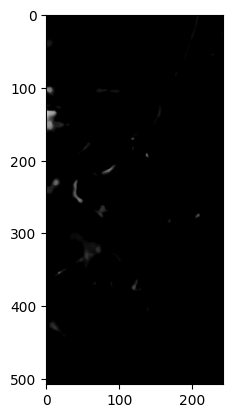

In [11]:
plt.imshow(cho)
print(cho)

C:\Users\Podokonnik\AppData\Local\Temp\ipykernel_13036\1614941690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['times'] = df['times'].astype(int)


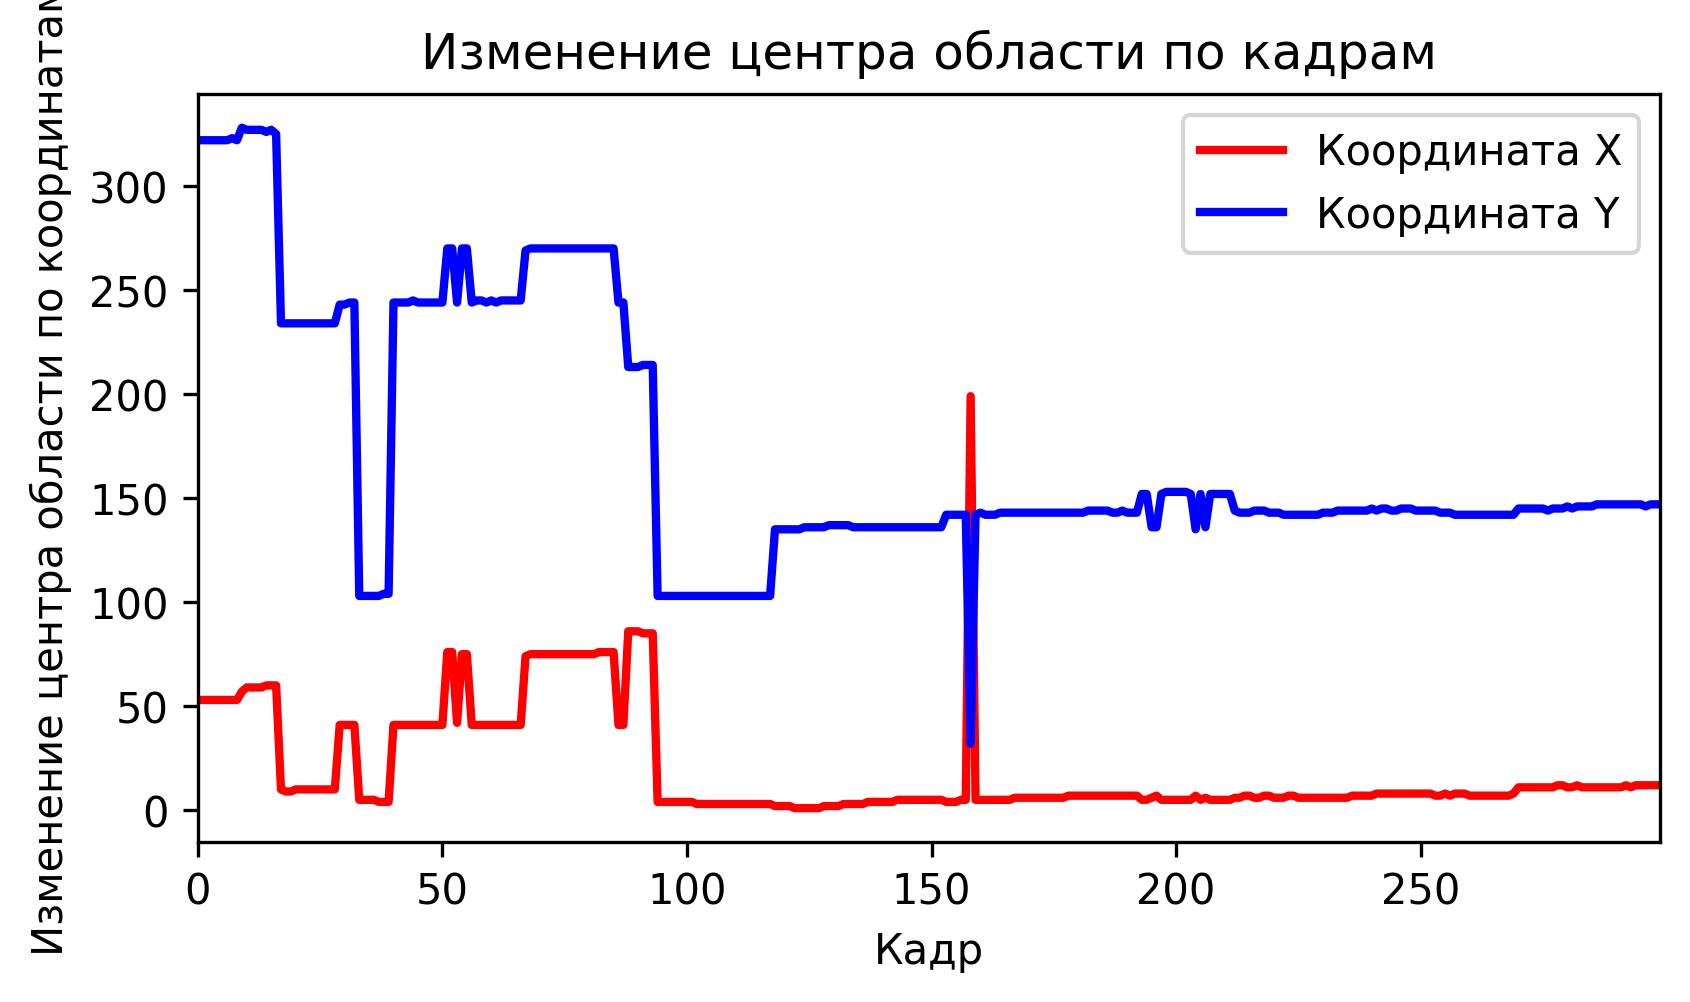

In [12]:
#6.10. координаты центра самой большой области в зависимости от номера кадра

def center_large_area(number, pyt):

   df_result = Datasety(pyt)
   df_video_number = df_result[number]
   df_type_video_events = df_video_number[df_video_number['types_of_video'] == 'events']
   df_sorted_moments = sorted_dataset_by_times(df_type_video_events)
   im_path = df_sorted_moments['file_path'].tolist()
   cX = []
   cY = []
   
   for path in im_path:
      img = cv2.imread(path)
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      ret, gray = cv2.threshold(gray, 10, 255,0)
      contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
      largest_area = sorted(contours, key=cv2.contourArea)[-1]
      mask = np.zeros(img.shape, np.uint8)
      yg = cv2.drawContours(mask, [largest_area], 0, (255,255,255,255), -1)
      canny_edges = cv2.Canny(yg, 10, 255, 0)
      M = cv2.moments(canny_edges)
      cX.append(int(M["m10"] / M["m00"]))
      cY.append(int(M["m01"] / M["m00"]))
   kadr = np.linspace(0, len(im_path)-1, len(im_path))
   plt.figure(figsize=(6.29, 3.24), dpi=300)  
   plt.plot(kadr, cX, color='red', linewidth=2)  
   plt.plot(kadr, cY, color='blue', linewidth=2)  
   plt.xlabel('Кадр')  
   plt.ylabel('Изменение центра области по координатам') 
   plt.title('Изменение центра области по кадрам')  
   plt.xlim(min(kadr), max(kadr))  
   plt.legend(['Координата Х', 'Координата Y'], loc='upper right')  
   plt.show()



      
coh = center_large_area(3, path_folder) 



In [13]:
#6.11. два числа: координаты среднего вектора смещения центра самой большой области 
#(смещение вычисляется по соседним кадрам, если расстояние между центрами не превышает 10мкм; 
# соседние кадры, на которых нет областей или расстояние между центрами слишком большое – пропускаются).
def average_displacement_vector(number, pyt):

    df_result = Datasety(pyt)
    df_video_number = df_result[number]
    df_type_video_events = df_video_number[df_video_number['types_of_video'] == 'events']
    df_sorted_moments = sorted_dataset_by_times(df_type_video_events)
    im_path = df_sorted_moments['file_path'].tolist()

    finalx = 0
    finaly = 0
    finalnumber = 0
    for path in im_path:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        maxim = 0
        mn = -1
        for l in range(len(contours)):
            if cv2.contourArea(contours[l]) > maxim:
                maxim = cv2.contourArea(contours[l])
                mn = 1
        maximum = contours[mn]
        x,y,w,h = cv2.boundingRect(maximum)
        cenx = (x+w)//2
        ceny = (y+h)//2
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        c,d = cv2.findContours(img2,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        maxim3 = 0
        mn2 = -1
        for r in range(len(c)):
            if cv2.contourArea(c[r]) > maxim3:
                maxim3 = cv2.contourArea(c[r])
                mn2 = r
        maximum2 = c[mn2]
        p, q, o, j = cv2.boundingRect(maximum2)
        cenx2 = (p + o)// 2
        ceny2 = (q + j)// 2
        if(-51 < (cenx - cenx2) < 51) and (-51 < (ceny - ceny2) < 51):
            finalx += (cenx - cenx2)
            finaly += (ceny - ceny2)
            finalnumber +=1
    return finalx/finalnumber, finaly/finalnumber

In [14]:
hoc = average_displacement_vector(0,path_folder)
print(hoc)

C:\Users\Podokonnik\AppData\Local\Temp\ipykernel_13036\1614941690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['times'] = df['times'].astype(int)


(-7.637254901960785, -13.558823529411764)
